DataSet
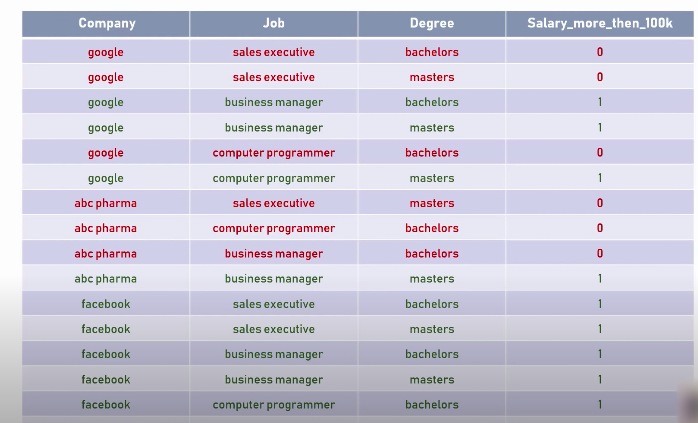

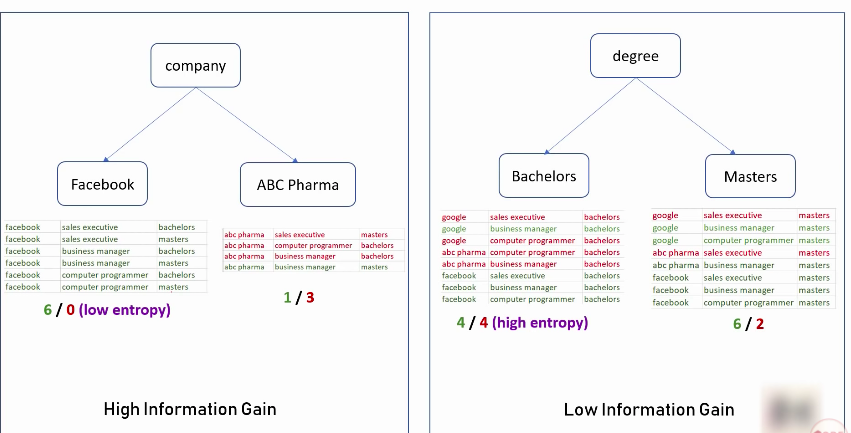

In [1]:
import pandas as pd
df = pd.read_csv("Salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


#### independent_variables = inputs

In [2]:
inputs = df.drop('salary_more_then_100k', axis='columns')
inputs # dropping the output/ target column


,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [3]:
target = df['salary_more_then_100k']
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [4]:
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


### Label Encoding the company, job and salary  columns of input dataframe

In [5]:
from sklearn.preprocessing import LabelEncoder

In [6]:
le_company = LabelEncoder()
le_job = LabelEncoder()
le_degree = LabelEncoder()

### Adding the encoded columns in the inputs

In [8]:
inputs['company_n'] = le_company.fit_transform(inputs['company'])
inputs['job_n'] = le_job.fit_transform(inputs['job'])
inputs['degree_n'] = le_degree.fit_transform(inputs['degree'])


In [11]:
inputs

,company,job,degree,company_n,job_n,degree_n
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


### Droping the previous columns

In [12]:
inputs_n = inputs.drop(['company','job','degree'], axis = 'columns')
inputs_n

,company_n,job_n,degree_n
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


### Now training the model

In [13]:
from sklearn import tree

In [14]:
model = tree.DecisionTreeClassifier()

In [15]:
model.fit(inputs_n, target)

DecisionTreeClassifier()

In [16]:
model.score(inputs_n, target)

1.0

In [17]:
model.predict([[2,2,1]]) # google, sales executive and masters degree

array([0])